<a href="https://colab.research.google.com/github/onlygoodman/python/blob/good/BreamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-3 빙어와 도미 기본
훈련데이터와 테스트데이터를 나누지 않고 KNN적용

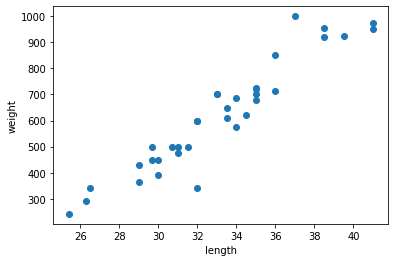

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#산점도 그리기

import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

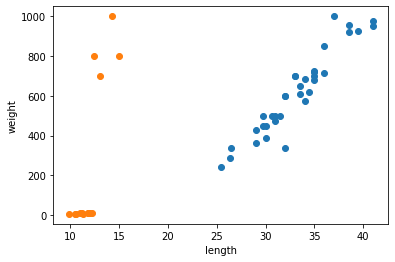

In [110]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 800, 700, 1000, 800]

#산점도를 빙어와 도미를 동시에 그리기

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [111]:
length = bream_length + smelt_length
weight = bream_weight + bream_weight

fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

fish_target = [1]*len(bream_length) + [0]*len(smelt_length)
print(fish_target)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 242.0], [10.5, 290.0], [10.6, 340.0], [11.0, 363.0], [11.2, 430.0], [11.3, 450.0], [11.8, 500.0], [11.8, 390.0], [12.0, 450.0], [12.2, 500.0], [12.4, 475.0], [13.0, 500.0], [14.3, 500.0], [15.0, 340.0]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [112]:
from sklearn.neighbors import KNeighborsClassifier

#임포트한 KNN 클래스 객체 형성

kn = KNeighborsClassifier(n_neighbors=1)

#scroe 전에 항상 fit으로 학습해주기
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [ ]:
kn.predict([[20, 50]])

array([0])

[[   1    0]
 [   1   25]
 [   1   50]
 ...
 [  40  950]
 [  40  975]
 [  40 1000]]
[0 0 0 ... 1 1 1]


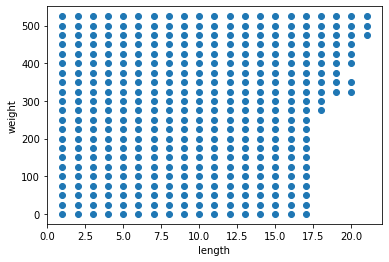

[ True  True  True ... False False False]


In [114]:
x = [i for i in range(1, 41)]
y = [i for i in range(0,1001, 25)]
z = []
for a in x :
  for b in y :
    z.append([a,b]) 
  
test_all_input = np.array(z)

print(test_all_input)
print(kn.predict(test_all_input))

predict_array = np.column_stack((test_all_input, kn.predict(test_all_input)))

predict_smelt = test_all_input[kn.predict(test_all_input)==0]
predict_bream = test_all_input[kn.predict(test_all_input)==1]



len(predict_smelt)
len(predict_bream)

import matplotlib.pyplot as plt

plt.scatter(predict_smelt[:,0], predict_smelt[:, 1])
# plt.scatter(predict_bream[:,0], predict_bream[:, 1])
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

print(kn.predict(test_all_input)==0)

In [118]:
kn.predict([[13, 1000]])

array([1])

kn.predict(input)에서 input 값은 array형식으로 집어 넣어준다.
output 값도 마찬가지로 array와 같은 형태로 반환된다.

KNeighborsClassifier 클래스의 기본값은 5개의 데이터를 참고하여 값을 반환한다.
n_neighbors 매개변수를 통해 참고하는 답의 개수를 반환 할 수 있다.

In [12]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
#fit(자료, 답) 순으로 학습

score49 = kn49.score(fish_data, fish_target)
print(35/49, score49)

0.7142857142857143 0.7142857142857143


# 2-1 훈련 세트와 테스트 세트
지도 학습과 비지도 학습의 차이를 배운다







In [15]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length2 = bream_length + smelt_length
weight2 = bream_weight + smelt_weight

fish_data2 = [[w, l] for w, l in zip(weight2, length2)]
fish_target2 = [1]*len(bream_length)+[0]*len(smelt_length)

#훈련데이터와 테스트데이터 나누기
#사이킷런 우선 임포트

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

import numpy as np
input_arr = np.array(fish_data2)
target_arr = np.array(fish_target2)

print(input_arr.shape)

(49, 2)


KNN에서 클래스가 원하는 자료형은 2차원 배열형태이다.
현재 input_arr은 49개의 데이터와 2개의 특성을 갖는 배열로 구성되어있다.

In [41]:
#random.seed("값") 을 지정하므로 랜덤하게 섞어주는 함수를 일정하게 맞춰준다.
np.random.seed(42)
index = np.arange(len(fish_data))
np.random.shuffle(index)

print(index)

#훈련데이터 생성
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(input_arr)
print("--------------------------")
print(input_arr[index[35:]])

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]
[[ 242.    25.4]
 [ 290.    26.3]
 [ 340.    26.5]
 [ 363.    29. ]
 [ 430.    29. ]
 [ 450.    29.7]
 [ 500.    29.7]
 [ 390.    30. ]
 [ 450.    30. ]
 [ 500.    30.7]
 [ 475.    31. ]
 [ 500.    31. ]
 [ 500.    31.5]
 [ 340.    32. ]
 [ 600.    32. ]
 [ 600.    32. ]
 [ 700.    33. ]
 [ 700.    33. ]
 [ 610.    33.5]
 [ 650.    33.5]
 [ 575.    34. ]
 [ 685.    34. ]
 [ 620.    34.5]
 [ 680.    35. ]
 [ 700.    35. ]
 [ 725.    35. ]
 [ 720.    35. ]
 [ 714.    36. ]
 [ 850.    36. ]
 [1000.    37. ]
 [ 920.    38.5]
 [ 955.    38.5]
 [ 925.    39.5]
 [ 975.    41. ]
 [ 950.    41. ]
 [   6.7    9.8]
 [   7.5   10.5]
 [   7.    10.6]
 [   9.7   11. ]
 [   9.8   11.2]
 [   8.7   11.3]
 [  10.    11.8]
 [   9.9   11.8]
 [   9.8   12. ]
 [  12.2   12.2]
 [  13.4   12.4]
 [  12.2   13. ]
 [  19.7   14.3]
 [  19.9   15. ]]
---------------

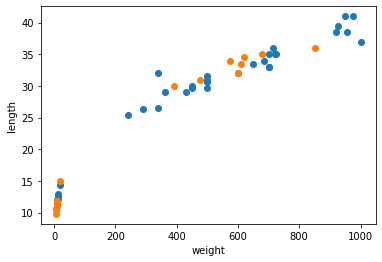

In [42]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:, 1])

plt.xlabel('weight')
plt.ylabel('length')
plt.show()

In [43]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

kn.predict(t)

1.0

# 2-2 데이터 전처리
올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거칩니다. 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일을 변환하는 방법을 배웁니다.

In [120]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight


import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])


[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


np.colum_stack((list, list)) 형식은
list와 list를 2차원으로 열을 기준으로 쭉 나열하여 나란히 붙여줍니다.

(1) 두 배열을 왼쪽에서 오른쪽으로 붙이기 

   : np.r_[a, b]

   : np.hstack([a, b])
   : np.concatenate((a, b), axis = 0)



(2) 두 배열을 위에서 아래로 붙이기

   : np.r_[[a], [b]]

   : np.vstack([a, b])

   : np.concatenate((c, d), axis = 1) # for 2D ~ array



(3) 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

    (Stack 1-D arrays as columns into a 2-D array)

   : np.c_[a, b]

   : np.column_stack([a, b])

   : np.concatenate((c.T, d.T), axis = 1) # for 2D~ array



 [ 배열을 옆으로, 위 아래로 붙이기 : np.r_, np.c_, np.hstack(), np.vstack(), np.column_stack(), np.concatenate(axis=0), np.concatenate(axis=1) ]

In [121]:
fish_target = np.concatenate((np.ones(len(bream_length)), np.zeros(len(smelt_length))))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


np.concatenate
np.ones
np.zeros

In [122]:
#사이킷런으로 훈련 셋 테스 셋 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

train_test_split() 함수는 사이킷런의 model_selection 모듈 아래 있다.

자동으로 나누기전에 알아서 섞어준다.

비율도 알아서 적절히 정해준다. 기본적으로 25%를 테스트 세트로 분리한다.

샘플링 편향이 나타난것을 해결하기 위해 stratify 조건을 추가해 해결가능하다.

fish_target 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눠줍니다.

In [123]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

print(test_target)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [124]:
print(kn.predict([[25,150]]))

[0.]


KNN의 KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() 방법을 제공합니다. 이 함수는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환합니다. n_neighbors의 기본값이 5이므로 5개의 이웃이 반환됩니다.

In [ ]:
# x = [i for i in range(41)]
# y = [i for i in range(0,1001,25)]
# z = []
# for a in x :
#   for b in y :
#     z.append([a,b]) 
  
# test_all_input = np.array(z)

# print(kn.predict(test_all_input))

# predict_array = np.column_stack((test_all_input, kn.predict(test_all_input)))

# predict_smelt = test_all_input[kn.predict(test_all_input)==0]
# predict_bream = test_all_input[kn.predict(test_all_input)==1]

# len(predict_smelt)
# len(predict_bream)

# import matplotlib.pyplot as plt

# plt.scatter(predict_smelt[:,0], predict_smelt[:, 1])
# plt.scatter(predict_bream[:,0], predict_bream[:, 1])
# plt.xlabel('length')
# plt.ylabel('weight')

# plt.show()

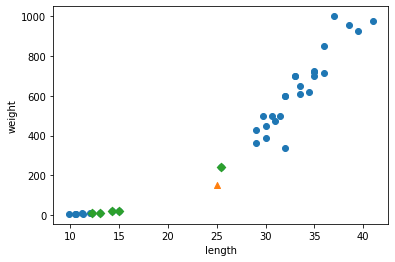

In [125]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

25, 150이 현재 참조하고 있는 값을 초록색 다이아몬드로 표시한다.
x, y축의 범위가 현재 현저히 차이나기 때문이다*** 
++ bream and smelt reserch에서 고민하던 이유를 알았다. // 0517

scaled하여 새로 트레이닝 시키면 x, y의 자료 범위와 관계없이 동일한 조건으로 비교가 가능합니다!


<function matplotlib.pyplot.show>

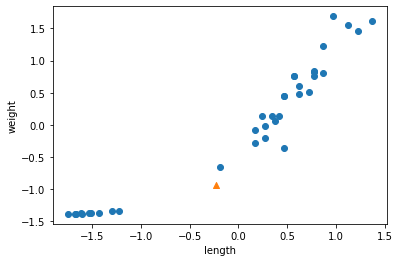

In [127]:
mean = np.mean(train_input, axis =0)
std = np.std(train_input, axis=0)

#mean = 평균, std = 표준편차

train_scaled = (train_input - mean)/std

new = ([25, 150]-mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

#x, y축의 범위가 -1.5~1.5로 바뀜

In [132]:
#새로 피팅된 트레이닝 데이터로 다시 훈련시키기

kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean)/std
kn.score(test_scaled, test_target)

print(kn.predict([new]))


[1.]


# 추가공부 >>> bream과 smelt 약 1600개의 데이터에서 도미와 방어의 인식 범위를 나타내는 산점도 그리기

[0. 0. 0. ... 1. 1. 1.]


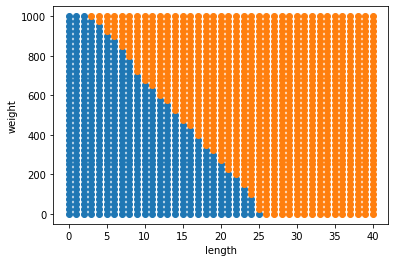

In [133]:
x = [i for i in range(41)]
y = [i for i in range(0,1001,25)]
z = []
for a in x :
  for b in y :
    z.append([a,b]) 
  
test_all_input = np.array(z)
test_all_scaled = (test_all_input - mean)/std

print(kn.predict(test_all_scaled))

predict_array = np.column_stack((test_all_input, kn.predict(test_all_scaled)))

predict_smelt = test_all_input[kn.predict(test_all_scaled)==0]
predict_bream = test_all_input[kn.predict(test_all_scaled)==1]

len(predict_smelt)
len(predict_bream)

import matplotlib.pyplot as plt

plt.scatter(predict_smelt[:,0], predict_smelt[:, 1])
plt.scatter(predict_bream[:,0], predict_bream[:, 1])
plt.xlabel('length')
plt.ylabel('weight')

plt.show()